# Technical Analysis Deliverable 1: A DataFrame that summarizes the key metrics for the ride-sharing data by city type.

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# Challenge: Check to make sure the index is a datetime data type 
# by using the info() method on the DataFrame. Date is an object, let's convert.
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [9]:
# Convert to datetime format.
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])

In [10]:
# Challenge: Rename columns
renamed_pyber_df = pyber_data_df.rename(columns={'city':'City',
                                                 'date':'Date',
                                                 'fare':'Fare',
                                                 'ride_id': 'Ride Id',
                                                 'driver_count': 'No. Drivers',
                                                 'type':'City Type'})
renamed_pyber_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [11]:
# Create the Urban, Suburban, and Rural city DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
average_fare_per_ride = total_fares / total_rides
average_fare_per_driver = total_fares / total_drivers

In [12]:
# Adding a list of values with keys to create a new DataFrame.
type_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver": average_fare_per_driver
                                })

type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
# Challenge: Formatting
type_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:,}".format)
type_summary_df["Total Drivers"] = type_summary_df["Total Drivers"].map("{:,}".format)
type_summary_df["Total Fares"] = type_summary_df["Total Fares"].map("${:,.2f}".format)
type_summary_df["Average Fare per Ride"] = type_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
type_summary_df["Average Fare per Driver"] = type_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [14]:
# Challenge: Remove the index name.
type_summary_df.index.name = None
type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [15]:
# Set the index to the Date column and create a new DataFrame that includes
# only the city type and fare columns using copy() method
new_pyber_data_df = renamed_pyber_df.set_index("Date")[['City Type', 'Fare']].copy()
new_pyber_data_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [16]:
# Challenge: Check to make sure the index is a datetime data type 
# by using the info() method on the DataFrame. Date is an object, let's convert.
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   datetime64[ns]
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   int64         
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 129.9+ KB


In [17]:
# Challenge: Create a pivot table DataFrame with the Date as the 
# index and columns = 'City Type'. The Fare for each Date should appear in each row.
new_pyber_data_df = new_pyber_data_df.pivot_table(index = "Date", columns = "City Type",values= "Fare")
new_pyber_data_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [18]:
# Create a new DataFrame from the pivot table DataFrame on the given dates, 
# '2019-01-01':'2019-04-28', using loc
date_df = new_pyber_data_df.loc['2019-01-01':'2019-04-28']
date_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
# Challenge: Create a new DataFrame by setting the DataFrame you created in Step 8 with resample() in weekly bins, 
# and calculate the sum() of the fares for each week in the resampled data.
resample_date_df = date_df.resample('w').sum()
resample_date_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


# Technical Analysis Deliverable 2: A multiple-line chart, with one line for each city type, that shows the sum of the fares for each week.

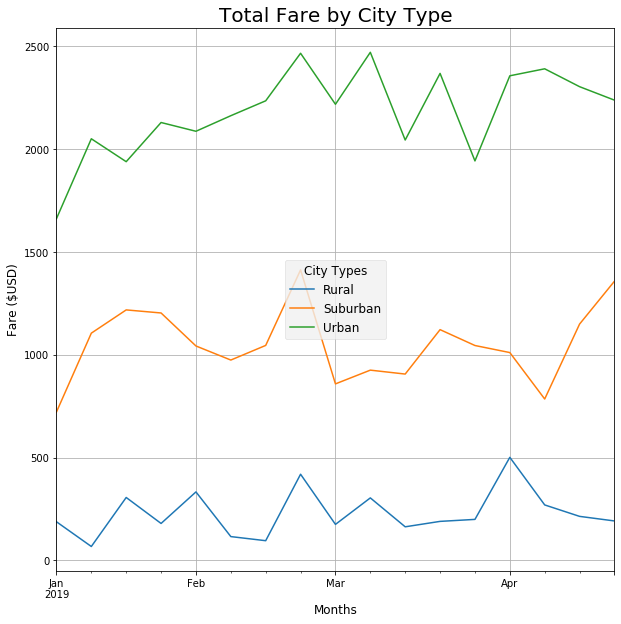

In [20]:
# Challenge: Using the object-oriented interface method, 
# plot the DataFrame you created in Step 9 using the df.plot() function.
resample_date_df.plot(figsize = (10,10))

# Challenge: Use 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Incorporate the other graph properties
plt.title("Total Fare by City Type", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=12)
plt.xlabel("Months", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()

# Edit the legend
lgnd = plt.legend(fontsize="12", 
                  mode="Expanded",
                  loc="center",
                  title="City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Save the figure.
plt.savefig("analysis/Fig8.png")

# Show the plot
plt.show()

# # Delivering Results: A written report of your results, saved in a README.md document on your GitHub repository.

In [21]:
# # PyBer_Analysis

# # Purpose and Data Results
# The purpose of this assignment is to learn how to use Matplotlib and NumPy to create visualize graphs, charts, scatter plots, bubble chart, or box-and-whisker plots in a data Data Series or DataFrame. 

# To analyze the data, we first have to import matplotlib, pandas, and numpy to provide statistical analysis. Afterwards, we have to merge the two csv files called city_data.csv and ride_data.csv. Then we use groupby function to split the data and analyze each city type by the ride_id, driver_count, and fare.

# Then, created a pivot table and analyze dates between 2019-01-01:2019-04-28. The data is then resample by using the resample function to analyze the data by weekly bins. Lastly, created a visualizing line chart to compare each city type by fare to do data analysis.
# In the summary DataFarme, urban cities showed higher fares than suburban and rural cities. Moreover, suburban fares are much greater than rural cities. See figure for visual line chart. 

# ## Table of Total Fare by City Type
# ![Total Fare by City Type](Table1.png)

# ## Line Chart of Total Fare by City Type
# ![Total Fare by City Type](Fig8.png)

# # Overcoming Challenges
# The assignment was both exciting and challenging. The most challenging part is to use groupby functions for total_rides, total_drivers, total_fares, average_fare_per_ride, and average_fare_per_driver. The groupby function for total_drivers were showing errors and I found out that the data had to be pulled from the city_data_df rather than the pyber_data_df. This is because the original data is from city_data.csv.

# Another challenging part is to use the resample function to analyze data in weekly bins using a date range. "Subheading Curiosity" I was also curious if the ranges can be reformatted to different dates such as mm/dd/yy or mm/dd/yyyy format.
# In order to overcome these challenges, I mainly used Google to find the information I needed. In addition, I used Slack to ask questions or find other classmates with similar questions I had.

# ## Link after searching Google for resample function:
# https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4

# ## Image of the Google search:
# ![Google Search](Google.png)

# ## Image of Slack information:
# ![Slack Information](Slack.png)

# # Data Analysis Conclusion
# Based on the data, urban cities showed higher fares than rural cities and suburban cities. In order to increase the amount of fares in rural cities and suburban cities, we have to check the amount of drivers available, the number of riders, and the cost of fares per city (the cost of fares could be different each city).

# I recommend providing scatter plots and box-and-whisker plots for additional data analysis. To analyze the data for scatter plots, use the plt.scatter function instead of the plt.plot function. Additionally, make each scatter plot different sizes using (e.g in rural cities, s=10*rural_driver_count) to make the sizes different for each driver count. The 10 stands for increase in overall size to see the scatter plots easier. For scatter plots, we can use another data set by comparing the average fare with the total number of rides per city. If we use scatter plots, we have to do additional analysis by finding the driver count for each city. An example of code would be urban_driver_count =  urban_cities_df.groupby(["city"]).mean()["driver_count"].

# For box-and-whisker plots, we have to use the ax.boxplot function. The purpose of the box-and-whisker plots is to compare each city with the standard deviation and to see if there are any outliers in our data. This will allow us to see if the data from each city type is comparable or different by comparing the minimum and maximum of the error bars. For box-and-whisker plots, we can use another data set comparing the number of rides by city types. For box-and-whisker plots, we need to find the number of ride counts for each city. An example of code for urban ride count would be urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"].
